In [4]:
import snscrape
import snscrape.modules.twitter as sn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
def politico(nome) : 
    #Definizione ricerca
    dizionario = ['"Klimawandel"' , '"Emissionen"' , '"Die globale Erwärmung"' ,
 '"Klimanotstands"' ,'"Pariser Abkommen"' , '"Treibhausgase"' , '"renewables"' , '"Klimastreik"' , '"Klimaregierung"']
    claim = nome  + dizionario[0]
    for i in dizionario :
        claim = claim  + ' OR ' + i 
    claim = claim  + ' until:2021-9-26 since:2020-9-26'
    print(claim)

    #ricerca e conto
    scrape = sn.TwitterSearchScraper(claim)
    counter = 0
    for i in scrape.get_items() :
        counter = counter +1
        
    #conto totale    
    claim = nome + ' until:2021-9-26 since:2020-9-26'
    scrape = sn.TwitterSearchScraper(claim)
    counter_tot = 0
    for i in scrape.get_items() :
        counter_tot = counter_tot +1

    if(counter_tot  == 0) : print('Errore')

    return counter/counter_tot , counter_tot , counter

In [6]:
Sholz = politico('from:OlafScholz')
SPD = politico('from:spdde')
Verdina = politico('from:ABaerbockArchiv')
verdi = politico('from:Die_Gruenen')
Laschet = politico('from:ArminLaschet')
CDUCSU = politico('from:cducsubt')
FDP = politico('from:fdp')
AfD = politico('from:AfDimBundestag')
Lindner = politico('from:c_lindner')
Weidel = politico('from:Alice_Weidel')

from:OlafScholz"Klimawandel" OR "Klimawandel" OR "Emissionen" OR "Die globale Erwärmung" OR "Klimanotstands" OR "Pariser Abkommen" OR "Treibhausgase" OR "renewables" OR "Klimastreik" OR "Klimaregierung" until:2021-9-26 since:2020-9-26
from:spdde"Klimawandel" OR "Klimawandel" OR "Emissionen" OR "Die globale Erwärmung" OR "Klimanotstands" OR "Pariser Abkommen" OR "Treibhausgase" OR "renewables" OR "Klimastreik" OR "Klimaregierung" until:2021-9-26 since:2020-9-26
from:ABaerbockArchiv"Klimawandel" OR "Klimawandel" OR "Emissionen" OR "Die globale Erwärmung" OR "Klimanotstands" OR "Pariser Abkommen" OR "Treibhausgase" OR "renewables" OR "Klimastreik" OR "Klimaregierung" until:2021-9-26 since:2020-9-26
from:Die_Gruenen"Klimawandel" OR "Klimawandel" OR "Emissionen" OR "Die globale Erwärmung" OR "Klimanotstands" OR "Pariser Abkommen" OR "Treibhausgase" OR "renewables" OR "Klimastreik" OR "Klimaregierung" until:2021-9-26 since:2020-9-26
from:ArminLaschet"Klimawandel" OR "Klimawandel" OR "Emissio

In [7]:
def somma(a , b) : 
    c = []
    for i in range(len(a)) : 
        c.append(a[i] + b[i])

    c[0] = c[2]/c[1]
    return c

In [8]:
risultati = [25.7 , 24.1, 14.8, 11.97 , 10.81 ]
partiti = ['SPD' , 'CDU/CSU' , 'Verdi' , 'FDP' , 'AfD']
tweet = [somma(Sholz , SPD) , somma(CDUCSU , Laschet) , somma(verdi , Verdina) , somma(Lindner , FDP) , somma(AfD , Weidel)]
tweet_p = [somma(Sholz , SPD)[0] , somma(CDUCSU , Laschet)[0] , somma(verdi , Verdina)[0] , somma(Lindner , FDP)[0] , somma(AfD , Weidel)[0]]
colori = ['red' , 'black' , 'green' , 'yellow' , 'lightblue' ]

dati = {'Partiti' : partiti , 'Tweet' : tweet , 'Risultati' : risultati , 'Colori' : colori , 'Tweet_p' : tweet_p}
Dati = pd.DataFrame(dati)
Dati.Tweet_p = (Dati.Tweet_p*50)
Dati.sort_values(by = 'Tweet_p' , inplace = True , ignore_index = True)
for i in range(len(Dati.Tweet)) :
    Dati.Tweet_p[i] = '{:1.2f}'.format(Dati.Tweet_p[i])
Dati

/tmp/ipykernel_77037/400153262.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dati.Tweet_p[i] = '{:1.2f}'.format(Dati.Tweet_p[i])


,Partiti,Tweet,Risultati,Colori,Tweet_p
0,AfD,"[0.0020026702269692926, 1498, 3]",10.81,lightblue,0.10
1,CDU/CSU,"[0.0061562139284340135, 2599, 16]",24.10,black,0.31
2,FDP,"[0.006531204644412192, 1378, 9]",11.97,yellow,0.33
3,SPD,"[0.009607233681831025, 3539, 34]",25.70,red,0.48
4,Verdi,"[0.0218209179834462, 1329, 29]",14.80,green,1.09


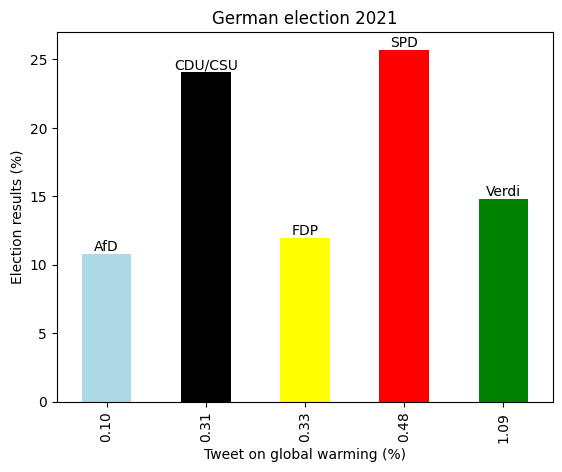

In [9]:
ax = Dati.plot.bar(x = 'Tweet_p' , y = 'Risultati'  , color= Dati['Colori'].array , legend = False , 
xlabel = 'Tweet on global warming (%)' , ylabel = 'Election results (%)' , title = "German election 2021")

counter = 0
for patch in ax.patches :
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0] 
    y = patch.get_height() + bl[1] +0.2
    ax.text(x,y,(Dati.Partiti[counter]),
            ha='center', rotation='horizontal')
    counter = counter +1

In [11]:
Dati.to_csv('Elezioni2021.csv' , index = False)